# 텐서플로우 실행하기

In [1]:
import tensorflow as tf

W0717 13:31:26.802998 4486428096 __init__.py:308] Limited tf.compat.v2.summary API due to missing TensorBoard installation.


In [2]:
hello = tf.constant('Hello TensorFlow')
print(hello)

sess = tf.Session()
result = sess.run(hello)
print(result)
sess.close()

Tensor("Const:0", shape=(), dtype=string)
b'Hello TensorFlow'


# 계산그래프 만들기

In [3]:
import tensorflow as tf

node1 = tf.constant(3, tf.float32) # explicitly dtype=tf.float32
node2 = tf.constant(4.0) # implicitly  tf.float32
node3 = tf.add(node1, node2)

In [4]:
# node1, node2, node3는 텐서 - 노드일뿐
print("node1: ", node1)
print("node2: ", node2)
print("node3: ", node3)

node1:  Tensor("Const_1:0", shape=(), dtype=float32)
node2:  Tensor("Const_2:0", shape=(), dtype=float32)
node3:  Tensor("Add:0", shape=(), dtype=float32)


In [5]:
session = tf.Session()
print("session.run([node1, node2]): ", session.run([node1, node2]))
print("session.run(node3): ", session.run(node3))

session.close() # session을 열었으면 닫아줘야함.(파일과 똑같이)


session.run([node1, node2]):  [3.0, 4.0]
session.run(node3):  7.0


# TensorFlow 자료형

### Constant

In [6]:
# 다른 type으로
a = tf.constant(1, dtype=tf.float32)
print(a)
print(a.shape)
with tf.Session() as session:
    print(session.run(a))

Tensor("Const_3:0", shape=(), dtype=float32)
()
1.0


In [7]:
# 다른 Shape으로
a = tf.constant(1, dtype=tf.float32, shape=(1,))
print(a)
print(a.shape)
with tf.Session() as session:
    print(session.run(a))

Tensor("Const_4:0", shape=(1,), dtype=float32)
(1,)
[1.]


In [8]:
# 2차원으로 설정
a = tf.constant(1, dtype=tf.float32, shape=(1,1))
print(a)
print(a.shape)
with tf.Session() as session:
    print(session.run(a))

Tensor("Const_5:0", shape=(1, 1), dtype=float32)
(1, 1)
[[1.]]


### Placeholder

In [9]:
import tensorflow as tf

input_data = [1, 2, 3]
x = tf.placeholder(dtype=tf.float32)

y = x * 2
print("x: ", x)
print("y: ", y)


session = tf.Session()

# feed_dict를 통해 값을 전달합니다.
result = session.run(y, feed_dict={x:input_data})
print(result)
session.close()

x:  Tensor("Placeholder:0", dtype=float32)
y:  Tensor("mul:0", dtype=float32)
[2. 4. 6.]


### Variable

In [10]:
x = tf.placeholder(dtype=tf.float32)
x_data = [1, 2, 4]

# 초기값: tf.random_normal([1, 3], stddev=0.35)
weights = tf.Variable([3], dtype=tf.float32)
biases = tf.Variable([4], dtype=tf.float32)

y = weights*x + biases

print("x: ", x)
print('weights: ', weights)
print('biases:', biases)


x:  Tensor("Placeholder_1:0", dtype=float32)
weights:  <tf.Variable 'Variable:0' shape=(1,) dtype=float32_ref>
biases: <tf.Variable 'Variable_1:0' shape=(1,) dtype=float32_ref>


### 개별 initializer

In [11]:
with tf.Session() as session:
    # 초기화 오퍼레이션을 실행
    session.run([weights.initializer, biases.initializer])
    
    result = session.run(y, feed_dict={x:x_data})
    print(result)
    
    # 변수 변경 // 변수 재 할당
    session.run(tf.assign(weights, [2]))
    
    # 다시 실행
    result = session.run(y, feed_dict={x:x_data})
    print(result)

[ 7. 10. 16.]
[ 6.  8. 12.]


### 전체 변수 한번에 초기화 - global_variables_initializer

In [12]:
x = tf.placeholder(dtype=tf.float32)
x_data = [1, 2, 4]

# 초기값: tf.random_normal([1, 3], stddev=0.35)
weights = tf.Variable([3], dtype=tf.float32)
biases = tf.Variable([4], dtype=tf.float32)

y = weights*x + biases

print("x: ", x)
print('weights: ', weights)
print('biases:', biases)


x:  Tensor("Placeholder_2:0", dtype=float32)
weights:  <tf.Variable 'Variable_2:0' shape=(1,) dtype=float32_ref>
biases: <tf.Variable 'Variable_3:0' shape=(1,) dtype=float32_ref>


In [13]:
# 변수 초기화 작업
init_op = tf.global_variables_initializer()

with tf.Session() as session:
    # 초기화 오퍼레이션을 실행
    session.run(init_op)
    
    result = session.run(y, feed_dict={x:x_data})
    print(result)
    
    # 변수 변경 // 변수 재 할당
    session.run(tf.assign(weights, [2]))
    
    # 다시 실행
    result = session.run(y, feed_dict={x:x_data})
    print(result)

[ 7. 10. 16.]
[ 6.  8. 12.]


# Tensor의 속성

In [14]:
a = tf.constant(1) # 0차원
b = tf.constant([1, 2], dtype=tf.float32) # 1차원
c = tf.constant([[1, 2], [3,4]], dtype=tf.int32) # 2차원, = 행렬
d = tf.constant(
    [
        [[1.0,2.0],[3, 4]],
        [[5,6],[7, 8]]
    ]
) # 3차원
# ...
print('a: ', a)
print('b: ', b)
print('c: ', c)
print('d: ', d)

a:  Tensor("Const_6:0", shape=(), dtype=int32)
b:  Tensor("Const_7:0", shape=(2,), dtype=float32)
c:  Tensor("Const_8:0", shape=(2, 2), dtype=int32)
d:  Tensor("Const_9:0", shape=(2, 2, 2), dtype=float32)


## rank

In [15]:
print("a's rank: ", a._rank())
print("b's rank: ", b._rank())
print("c's rank: ", c._rank())
print("d's rank: ", d._rank())

print("-"*50)
# 아래는  텐서로 반환
print("a's rank: ", tf.rank(a))
print("b's rank: ", tf.rank(b))
print("c's rank: ", tf.rank(c))
print("d's rank: ", tf.rank(d))

a's rank:  0
b's rank:  1
c's rank:  2
d's rank:  3
--------------------------------------------------
a's rank:  Tensor("Rank:0", shape=(), dtype=int32)
b's rank:  Tensor("Rank_1:0", shape=(), dtype=int32)
c's rank:  Tensor("Rank_2:0", shape=(), dtype=int32)
d's rank:  Tensor("Rank_3:0", shape=(), dtype=int32)


## Shape

In [16]:
print("a's shape: ", a.get_shape())
# print("a's shape: ", a.shape)# 같은 결과
print("b's shape: ", b.get_shape())
print("c's shape: ", c.get_shape())
print("d's shape: ", d.get_shape())

print("-"*50)

# 아래는  텐서로 반환
print("a's shape: ", tf.shape(a))
print("b's shape: ", tf.shape(b))
print("c's shape: ", tf.shape(c))
print("d's shape: ", tf.shape(d))

a's shape:  ()
b's shape:  (2,)
c's shape:  (2, 2)
d's shape:  (2, 2, 2)
--------------------------------------------------
a's shape:  Tensor("Shape:0", shape=(0,), dtype=int32)
b's shape:  Tensor("Shape_1:0", shape=(1,), dtype=int32)
c's shape:  Tensor("Shape_2:0", shape=(2,), dtype=int32)
d's shape:  Tensor("Shape_3:0", shape=(3,), dtype=int32)


## dtype

In [17]:
print("a's type: ", a.dtype)
print("b's type: ", b.dtype)
print("c's type: ", c.dtype)
print("d's type: ", d.dtype)

a's type:  <dtype: 'int32'>
b's type:  <dtype: 'float32'>
c's type:  <dtype: 'int32'>
d's type:  <dtype: 'float32'>


# Session 관리

### tf.get_default_session()

In [18]:
session = tf.get_default_session()
print(session)

None


In [19]:
with tf.Session() as sess:
    print(tf.get_default_session())

### eval(), initializer.run()

In [20]:
a = tf.constant(2, dtype=tf.float32)
b = tf.Variable(3, dtype=tf.float32)
c = a * b


In [21]:
with tf.Session() as sess:
    print(sess.run(b.initializer))
    print(sess.run(a))
    print(sess.run(c))

    print('-'*10)
    #### 똑같은 결과
    print(b.initializer.run())
    print(a.eval())
    print(c.eval())

None
2.0
6.0
----------
None
2.0
6.0


### tf.InteractiveSesison

In [22]:
sess = tf.InteractiveSession()
sess.run(b.initializer)
print(a.eval())
print(c.eval())
sess.close()

2.0
6.0


# Graph 관리하기

### get_default_graph()

In [23]:
tf.get_default_graph()

In [24]:
a = tf.Variable(3)
a.graph is tf.get_default_graph()

True

### Graph객체

In [25]:
graph = tf.Graph()
with graph.as_default():
    b = tf.Variable(2)
    

In [26]:
b.graph is graph

True

In [27]:
tf.get_default_graph().get_operations()

[<tf.Operation 'Const' type=Const>,
 <tf.Operation 'Const_1' type=Const>,
 <tf.Operation 'Const_2' type=Const>,
 <tf.Operation 'Add' type=Add>,
 <tf.Operation 'Const_3' type=Const>,
 <tf.Operation 'Const_4' type=Const>,
 <tf.Operation 'Const_5' type=Const>,
 <tf.Operation 'Placeholder' type=Placeholder>,
 <tf.Operation 'mul/y' type=Const>,
 <tf.Operation 'mul' type=Mul>,
 <tf.Operation 'Placeholder_1' type=Placeholder>,
 <tf.Operation 'Variable/initial_value' type=Const>,
 <tf.Operation 'Variable' type=VariableV2>,
 <tf.Operation 'Variable/Assign' type=Assign>,
 <tf.Operation 'Variable/read' type=Identity>,
 <tf.Operation 'Variable_1/initial_value' type=Const>,
 <tf.Operation 'Variable_1' type=VariableV2>,
 <tf.Operation 'Variable_1/Assign' type=Assign>,
 <tf.Operation 'Variable_1/read' type=Identity>,
 <tf.Operation 'mul_1' type=Mul>,
 <tf.Operation 'add_1' type=Add>,
 <tf.Operation 'Assign/value' type=Const>,
 <tf.Operation 'Assign' type=Assign>,
 <tf.Operation 'Placeholder_2' type=P

In [28]:
tf.reset_default_graph()
tf.get_default_graph().get_operations()

[]

# 자주 쓰이는 함수들

## 상수만드는 함수

### zeros

In [29]:
a = tf.zeros((3,3), tf.float32)
print(a)
print('-'*30)
with tf.Session() as sess:
    print(sess.run(a))

Tensor("zeros:0", shape=(3, 3), dtype=float32)
------------------------------
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]


### zeros_like

In [30]:
a = tf.constant([[1,2,3],[4,5,6]])
print(a.get_shape())

print('-'*30)

b = tf.zeros_like(a, tf.float32)
print(b.get_shape())
with tf.Session() as sess:
    print(sess.run(b))

(2, 3)
------------------------------
(2, 3)
[[0. 0. 0.]
 [0. 0. 0.]]


### ones

In [31]:
a = tf.ones((3,3), tf.float32)
print(a)
print('-'*30)
with tf.Session() as sess:
    print(sess.run(a))

Tensor("ones:0", shape=(3, 3), dtype=float32)
------------------------------
[[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]]


### ones_like

In [32]:
a = tf.constant([[1,2,3],[4,5,6]])
print(a.get_shape())

print('-'*30)

b = tf.ones_like(a, tf.float32)
print(b.get_shape())
with tf.Session() as sess:
    print(sess.run(b))

(2, 3)
------------------------------
(2, 3)
[[1. 1. 1.]
 [1. 1. 1.]]


## 시퀀스 만드는 함수

### linspace

In [33]:
a = tf.linspace(1.0, 3.0, 10)
print(a)
print('-'*30)
with tf.Session() as sess:
    print(sess.run(a))

Tensor("LinSpace:0", shape=(10,), dtype=float32)
------------------------------
[1.        1.2222222 1.4444444 1.6666667 1.8888888 2.1111112 2.3333335
 2.5555556 2.7777777 3.       ]


### range

In [34]:
# start: 3, limit: 18, delta: 3
a = tf.range(3, 18, 3)

# limit:5
b = tf.range(5)

print(a)
print(b)
print('-'*30)
with tf.Session() as sess:
    print("a: ", sess.run(a))
    print("b: ", sess.run(b))

Tensor("range:0", shape=(5,), dtype=int32)
Tensor("range_1:0", shape=(5,), dtype=int32)
------------------------------
a:  [ 3  6  9 12 15]
b:  [0 1 2 3 4]


## 난수 추출 함수

### random_normal

In [35]:
a = tf.random_normal((3,3), dtype=tf.float32)
print(a)
print('-'*30)
with tf.Session() as sess:
    print(sess.run(a))

Tensor("random_normal:0", shape=(3, 3), dtype=float32)
------------------------------
[[ 0.8466059   0.6799951  -0.9283994 ]
 [ 1.6617868   0.262241   -1.3787961 ]
 [ 0.8076152   0.52787364  0.7637496 ]]


### ranom_uniform

In [36]:
a = tf.random_uniform((3,3), dtype=tf.float32)
print(a)
print('-'*30)
with tf.Session() as sess:
    print(sess.run(a))

Tensor("random_uniform:0", shape=(3, 3), dtype=float32)
------------------------------
[[0.21060848 0.11433518 0.45305562]
 [0.10450816 0.98028564 0.51662135]
 [0.20226789 0.5722877  0.76226735]]


### random_shuffle

In [37]:
a = tf.range(1, 20, 3)
b = tf.random_shuffle(a, seed=42)

print(b)
print('-'*30)
with tf.Session() as sess:
    print(sess.run(b))

Tensor("RandomShuffle:0", shape=(7,), dtype=int32)
------------------------------
[19 16  4 13  1  7 10]


## 텐서변환

### tf.cast

In [38]:
a = tf.constant(2.2, dtype=tf.float32)
print(a)
b = tf.cast(a, tf.int32)
print(b)

Tensor("Const_2:0", shape=(), dtype=float32)
Tensor("Cast:0", shape=(), dtype=int32)


### tf.reshape

In [39]:
a = tf.linspace(1.0, 10, 100)
tf.reshape(a, (10, -1))

<tf.Tensor 'Reshape:0' shape=(10, 10) dtype=float32>

## 수학함수

### tf.abs

In [40]:
a = tf.range(-10.0, 10, dtype=tf.float32)
b = tf.abs(a)

with tf.Session() as sess:
    print(sess.run(a))
    print('-'*30)
    print(sess.run(b))

[-10.  -9.  -8.  -7.  -6.  -5.  -4.  -3.  -2.  -1.   0.   1.   2.   3.
   4.   5.   6.   7.   8.   9.]
------------------------------
[10.  9.  8.  7.  6.  5.  4.  3.  2.  1.  0.  1.  2.  3.  4.  5.  6.  7.
  8.  9.]


### tf.sqrt

In [41]:
a = tf.range(0, 20, dtype=tf.float32)
b = tf.sqrt(a)

with tf.Session() as sess:
    print(sess.run(a))
    print('-'*30)
    print(sess.run(b))

[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 18. 19.]
------------------------------
[0.         0.99999994 1.4142134  1.7320508  1.9999999  2.236068
 2.4494896  2.6457512  2.8284268  2.9999998  3.1622777  3.3166249
 3.4641016  3.6055508  3.7416573  3.8729832  4.         4.1231055
 4.2426405  4.358899  ]


### tf.exp

In [42]:
a = tf.range(0, 20, dtype=tf.float32)
b = tf.exp(a)

with tf.Session() as sess:
    print(sess.run(a))
    print('-'*30)
    print(sess.run(b))

[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 18. 19.]
------------------------------
[1.0000000e+00 2.7182817e+00 7.3890562e+00 2.0085537e+01 5.4598152e+01
 1.4841316e+02 4.0342880e+02 1.0966332e+03 2.9809580e+03 8.1030840e+03
 2.2026465e+04 5.9874141e+04 1.6275480e+05 4.4241338e+05 1.2026042e+06
 3.2690175e+06 8.8861110e+06 2.4154952e+07 6.5659968e+07 1.7848230e+08]


### tf.log

In [43]:
a = tf.range(1, 20, dtype=tf.float32)
b = tf.log(a)

with tf.Session() as sess:
    print(sess.run(a))
    print('-'*30)
    print(sess.run(b))

[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17. 18.
 19.]
------------------------------
[0.        0.6931472 1.0986123 1.3862944 1.609438  1.7917595 1.9459102
 2.0794415 2.1972246 2.3025851 2.3978953 2.4849067 2.5649493 2.6390574
 2.7080503 2.7725887 2.8332133 2.8903718 2.944439 ]


### matrix  

In [44]:
X = tf.range(20, dtype=tf.float32)
X = tf.reshape(X, (4,5))


Y = tf.ones((4,5), dtype=tf.float32)
print(X.shape, Y.shape)

(4, 5) (4, 5)


In [45]:
# XY = tf.matmul(X, Y) # 오류 발생
Y = tf.transpose(Y)
print(X.shape, Y.shape)

(4, 5) (5, 4)


In [46]:
XY = tf.matmul(X,Y)
print(XY)

with tf.Session() as sess:
    print('-'*30)
    print(sess.run(XY))

Tensor("MatMul:0", shape=(4, 4), dtype=float32)
------------------------------
[[10. 10. 10. 10.]
 [35. 35. 35. 35.]
 [60. 60. 60. 60.]
 [85. 85. 85. 85.]]


## Reduce --- (sum, prod, min, max, mean, ...)

차원을 줄이면서 ~~~ 한다.

In [47]:
X = [[1, 2],
     [3, 4]]

r_sum0 = tf.reduce_sum(X) # 첫번째 배열 (바깥쪽)
r_sum1 = tf.reduce_sum(X, axis=0) # 첫번째 배열 (바깥쪽)
r_sum2 = tf.reduce_sum(X, axis=1) # 두번째 배열 (안쪽)

with tf.Session() as sess:
    print(sess.run(r_sum0))
    print('-'*30)
    
    print(sess.run(r_sum1))
    print('-'*30)
    print(sess.run(r_sum2))

10
------------------------------
[4 6]
------------------------------
[3 7]


In [48]:
X = [[1, 2],
     [3, 4]]

r_prod0 = tf.reduce_prod(X) # 첫번째 배열 (바깥쪽)
r_prod1 = tf.reduce_prod(X, axis=0) # 첫번째 배열 (바깥쪽)
r_prod2 = tf.reduce_prod(X, axis=1) # 두번째 배열 (안쪽)

with tf.Session() as sess:
    print(sess.run(r_prod0))
    print('-'*30)
    
    print(sess.run(r_prod1))
    print('-'*30)
    print(sess.run(r_prod2))

24
------------------------------
[3 8]
------------------------------
[ 2 12]


# 연습문제1.
덧셈 프로그램 작성  
상수 두개인 텐서(5, 8)를 작성하고 덧셈을 연산하는 그래프를 작성하시오.  
그리고 해당 결과를 출력하고 확인하시오.  


# 연습문제2.
tf.linspace를 이용해 0부터 10까지 숫자 100개를 만들고 node1에 Tensor를 선언하고  
node2에는 node1에 3을 곱하고  
node3에는 float32타입의 placeholder를 선언하시오.  
node4에는 node2와 node3를 더하시오.  
실행시 node3에 값을 1부터 10까지 하여 node4를 반복 출력하시오.(for문)  

# 모범답안

### 연습문제1

In [49]:
# node1 = tf.constant(5) # 오류 발생
node1 = tf.constant(5, dtype=tf.float32) # node1 = tf.constant(5.0)
node2 = tf.constant(8.3)
node3 = tf.add(node1,node2)
# node3 = node1 + node2

with tf.Session() as sess:
    print(node3.eval())

13.3


### 연습문제2

In [50]:
node1 = tf.linspace(0.0,10,100)
node2 = node1*3
node3 = tf.placeholder(tf.float32)
node4 = node2 + node3

with tf.Session() as session:
    for i in range(1, 11):
        result = session.run(node4, feed_dict={node3:i})
        print(result)
        print('-'*50)

[ 1.         1.3030303  1.6060606  1.909091   2.2121212  2.5151515
  2.818182   3.121212   3.4242425  3.7272725  4.030303   4.333333
  4.636364   4.939394   5.242424   5.5454545  5.848485   6.151515
  6.454545   6.7575755  7.060606   7.363636   7.666666   7.9696965
  8.272728   8.575758   8.878788   9.181818   9.484848   9.787879
 10.090909  10.393939  10.69697   11.        11.30303   11.60606
 11.90909   12.212121  12.515151  12.818181  13.121212  13.424242
 13.727272  14.030303  14.333332  14.636364  14.939393  15.242424
 15.545455  15.848484  16.151516  16.454544  16.757576  17.060606
 17.363636  17.666666  17.969696  18.272726  18.575758  18.878788
 19.181818  19.484848  19.787878  20.090908  20.39394   20.69697
 21.        21.30303   21.60606   21.909092  22.21212   22.515152
 22.81818   23.121212  23.424242  23.727272  24.030302  24.333332
 24.636362  24.939394  25.242424  25.545454  25.848484  26.151516
 26.454544  26.757576  27.060606  27.363636  27.666664  27.969696
 28.272728

# 실습으로 구현하는 TensorFlow

## Califonia Dataset으로 Linear Regression 구현하기

### 실행순서
1. Data Load (Califonia Data)
2. Data 전처리
3. Graph 정의( Linear Regression)
4. 실행

In [15]:
import numpy as np
import tensorflow as tf
from sklearn.datasets import fetch_california_housing

def reset_all(seed=0):
    # 왜 할까요? 생각해봅시다.
    tf.reset_default_graph() # graph 초기화
    tf.set_random_seed(seed) # tf.random_seed 초기화
    np.random.seed(seed) # np.random_seed 초기화

In [52]:
reset_all()

## 1.Data 로드

In [53]:
housing = fetch_california_housing()

In [54]:
housing.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR'])

In [55]:
housing_data = housing.data # X
housing_label = housing.target # Y

m, n = housing_data.shape # shape 저장 (m X n)행렬
# bias 추가. (1)

#### data 탐색하기

In [56]:
import pandas as pd
housing_df = pd.DataFrame(housing.data, columns=housing.feature_names)
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [57]:
# 결측치는 없네요.
# 모든 데이터는 float 형이구요.
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 8 columns):
MedInc        20640 non-null float64
HouseAge      20640 non-null float64
AveRooms      20640 non-null float64
AveBedrms     20640 non-null float64
Population    20640 non-null float64
AveOccup      20640 non-null float64
Latitude      20640 non-null float64
Longitude     20640 non-null float64
dtypes: float64(8)
memory usage: 1.3 MB


In [58]:
housing_df.describe()
# 확인해보니.. 표준편차 차이가 크네요. 
# 그리고 값의 범위도 다 달라요.
# Feature Scaling이 필요하겠군요.

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000


## 2. 전처리하기

In [59]:
# 전처리가 필요하다.
# 데이터간 스케일이 크면 학습이 잘 안된다. (속도가 더디거나 발산함.(lr을 줄여야함))
print("mean: ", housing_data.mean(axis=0)) 
print("shape: ", housing_data.shape)

mean:  [ 3.87067100e+00  2.86394864e+01  5.42899974e+00  1.09667515e+00
  1.42547674e+03  3.07065516e+00  3.56318614e+01 -1.19569704e+02]
shape:  (20640, 8)


### 표준화

In [60]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler # sklearn의 StandardScaler 사용
scaler = StandardScaler() # 표준화
scaled_housing_data = scaler.fit_transform(housing_data) 

In [61]:
# 평균이 0이고 표준편차가 1.
pd.DataFrame(scaled_housing_data, columns=housing.feature_names).describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,2.064000e+04,2.064000e+04,2.064000e+04,2.064000e+04,2.064000e+04,2.064000e+04,2.064000e+04,2.064000e+04
mean,6.609700e-17,5.508083e-18,6.609700e-17,-1.060306e-16,-1.101617e-17,3.442552e-18,-1.079584e-15,-8.526513e-15
std,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00
min,-1.774299e+00,-2.196180e+00,-1.852319e+00,-1.610768e+00,-1.256123e+00,-2.290000e-01,-1.447568e+00,-2.385992e+00
25%,-6.881186e-01,-8.453931e-01,-3.994496e-01,-1.911716e-01,-5.638089e-01,-6.171062e-02,-7.967887e-01,-1.113209e+00
50%,-1.767951e-01,2.864572e-02,-8.078489e-02,-1.010650e-01,-2.291318e-01,-2.431585e-02,-6.422871e-01,5.389137e-01
75%,4.593063e-01,6.643103e-01,2.519615e-01,6.015869e-03,2.644949e-01,2.037453e-02,9.729566e-01,7.784964e-01
max,5.858286e+00,1.856182e+00,5.516324e+01,6.957171e+01,3.025033e+01,1.194191e+02,2.958068e+00,2.625280e+00


In [62]:
# 정규화 예)
scaler2 = MinMaxScaler()
scaled_housing_data2 = scaler2.fit_transform(housing_data)

In [63]:
scaled_housing_data2
# 평균이 0이고 표준편차가 1.
pd.DataFrame(scaled_housing_data2, columns=housing.feature_names).describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,0.232464,0.541951,0.032488,0.022629,0.039869,0.001914,0.328572,0.476125
std,0.131020,0.246776,0.017539,0.014049,0.031740,0.008358,0.226988,0.199555
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.142308,0.333333,0.025482,0.019943,0.021974,0.001398,0.147715,0.253984
50%,0.209301,0.549020,0.031071,0.021209,0.032596,0.001711,0.182784,0.583665
75%,0.292641,0.705882,0.036907,0.022713,0.048264,0.002084,0.549416,0.631474
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### 결측치 처리

In [64]:
# 결측치가 없어요. --> 처리할 게 없어요.
pd.DataFrame(scaled_housing_data, columns=housing.feature_names).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 8 columns):
MedInc        20640 non-null float64
HouseAge      20640 non-null float64
AveRooms      20640 non-null float64
AveBedrms     20640 non-null float64
Population    20640 non-null float64
AveOccup      20640 non-null float64
Latitude      20640 non-null float64
Longitude     20640 non-null float64
dtypes: float64(8)
memory usage: 1.3 MB


### bias 데이터에 추가

In [65]:
# np.c_ 함수는 concatenate 함수 (연결한다!)
# bias에 행렬 추가
scaled_housing_data_plus_bias = np.c_[np.ones((m, 1)), scaled_housing_data] ## bias 추가

print("mean(항목간): ", scaled_housing_data_plus_bias.mean(axis=0))
print("mean(전체): ", scaled_housing_data_plus_bias.mean())
print("shape: ",scaled_housing_data_plus_bias.shape)

mean(항목간):  [ 1.00000000e+00  6.60969987e-17  5.50808322e-18  6.60969987e-17
 -1.06030602e-16 -1.10161664e-17  3.44255201e-18 -1.07958431e-15
 -8.52651283e-15]
mean(전체):  0.11111111111111005
shape:  (20640, 9)


## 3. Graph 정의

#### 0. epoch, learning_rate 정의
#### 1. X와 y정의  (Placeholder)
#### 2. Hypothesis&Cost 함수 정의
#### 3. Optimizer정의

In [66]:
# 그래프 초기화
tf.reset_default_graph()

In [67]:
n_epochs = 1000 # epoch --> 학습횟수(반복횟수)
lr = 0.01 # learning rate

#### 1. X와 y정의

In [68]:
scaled_housing_data_plus_bias.shape

(20640, 9)

In [69]:
X = tf.placeholder(dtype=tf.float32, shape=(None, 9), name="X")
y = tf.placeholder(dtype=tf.float32, shape=(None, 1), name='y')

#### Hypothesis&Cost 정의

In [70]:
m,n

(20640, 8)

In [71]:
# M: 데이터의 개수, N: Feature의 개수
# n(feature의 개수) +1 --> bias
W = tf.Variable(tf.random_uniform([n+1, 1], -1.0, 1.0), name='Weight')  # N+1 X 1 행렬
y_pred = tf.matmul(X, W, name='predictions') # hypothesis  --> M X 1행렬  = M X N+1 * N+1 X 1 

In [72]:
# ==> y값은 MX1 로 넣어줘야함 행렬연산 위해
error = y_pred - y # MX1행렬 (데이터의 개수 만큼 error가 나옴.) --> Data 1개당 에러 (오차)  

# Mean Sqaure Error
mse = tf.reduce_mean(tf.square(error), name='mse') # Cost Function

#### optimizer 방법1. 직접 미분

In [73]:
# Optimizer = Gradient Descent

# (N+1) X M  *  M X 1 = (N+1) X 1 행렬 --> (Feature+1)의 개수만큼 나오지요.
gradients = 2/m * tf.matmul(tf.transpose(X), error) # feature 하나당 기울기 계산. (편미분)

training_op = tf.assign(W, W - (lr * gradients)) # optimizer 역할 (gradient 업데이트)

#### optimizer 방법2. 자동 미분

In [74]:
# tensorflow의 자동 미분 기능 (기울기 미분 자동)
gradients = tf.gradients(mse, [W])[0]  # W에 대한 mse 함수
training_op = tf.assign(W, W - (lr * gradients)) # optimizer 역할 (gradient 업데이트)

#### optimizer 방법3. 옵티마이저 사용

In [75]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=lr)
# mse를 최소화하는게 목적!
traing_op = optimizer.minimize(mse) 

### label reshape

In [76]:
housing_label.shape
# 행렬간 연산을 위해선 2차원 행렬로 만들어줘야함.
housing_label = housing_label.reshape(-1, 1)
housing_label.shape

(20640, 1)

In [77]:
init = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init)

    for epoch in range(n_epochs):
        if epoch % 100 == 0:
            # placeholder 추가
            print("Epoch", epoch, "MSE =", 
                  mse.eval(feed_dict={
                      X:scaled_housing_data_plus_bias, 
                      y:housing_label})
                 )
        
        # weight 업데이트
        sess.run(training_op, feed_dict={X:scaled_housing_data_plus_bias, y:housing_label})
    
    best_weight = W.eval()

best_weight

Epoch 0 MSE = 6.5061374
Epoch 100 MSE = 0.802116
Epoch 200 MSE = 0.6705681
Epoch 300 MSE = 0.63207287
Epoch 400 MSE = 0.60485876
Epoch 500 MSE = 0.58478475
Epoch 600 MSE = 0.5699107
Epoch 700 MSE = 0.55885243
Epoch 800 MSE = 0.55060124
Epoch 900 MSE = 0.5444207


array([[ 2.0685525 ],
       [ 0.8710128 ],
       [ 0.16237572],
       [-0.27665558],
       [ 0.28539938],
       [ 0.01082927],
       [-0.04389907],
       [-0.5430066 ],
       [-0.5152347 ]], dtype=float32)

# Linear Regression 눈으로 확인하기

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt

W0718 00:46:53.434810 4498535872 __init__.py:308] Limited tf.compat.v2.summary API due to missing TensorBoard installation.


### 1. dataLoad

In [2]:
# y = 2*x + 1
# w[1] = 2, w[0]= 1
x_data = [1, 2, 3]
y_data = [3, 5, 7]

### 2. Graph 정의

In [3]:
# W1과 W0을 구하는게 우리의 목표!
# 일단 하나 정하고 조정하기. ==> Variable을 쓰고, 초기값 설정
W = tf.Variable(tf.random_uniform([1], -100, 100)) # W1 - Weight
b = tf.Variable(tf.random_uniform([1], -100, 100)) # W0 - bias

# name: 나중에 텐서보드등으로 값의 변화를 추적하거나 살펴보기 쉽게 하기 위해 이름을 붙여준다.
# 왜 tf.placeholder를 사용하는가? 생각해보자!
# 
# 새로운 데이터를 예측하기 위해서 훈련을 합니다.
# --> 기존데이터로 훈련을 하고, 훈련된 모델을 새로운 데이터로 바꿀 수 있어야 합니다.
X = tf.placeholder(tf.float32, name="X") # 훈련 데이터
Y = tf.placeholder(tf.float32, name="Y") # 정답 데이터

In [4]:
# hypothesis 정의
# W 와 X 가 행렬이 아니므로 tf.matmul 이 아니라 기본 곱셈 기호를 사용한다.
hypothesis = W * X + b

# Cost Function을 작성한다. (손실 함수)
# mean(h - Y)^2 : 예측값과 실제값의 차이의 제곱의 평균
err = tf.square(hypothesis - Y)
cost = tf.reduce_mean(err)


In [5]:
# 훈련률: 0.1: optimizer가 Variable을(Weight를) 자동으로 조정한다.
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.1) 

# 비용을 최소화 하는 것이 최종 목표
train_op = optimizer.minimize(cost)  # compute_gradients, apply_gradients가 실행됩니다.

### 3. 학습

None
 step: 0
 cost:3315.118408203125
 Weight: [-8.506901] 
 bias:[18.299866]
--------------------------------------------------


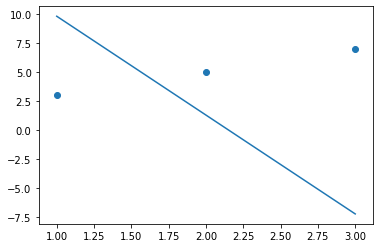

None
 step: 20
 cost:19.19765281677246
 Weight: [-2.9665217] 
 bias:[12.2900715]
--------------------------------------------------


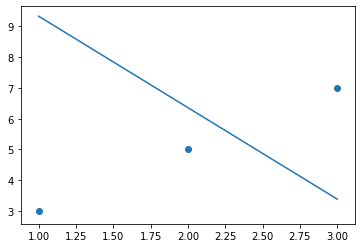

None
 step: 40
 cost:7.253393173217773
 Weight: [-1.0528036] 
 bias:[7.93974]
--------------------------------------------------


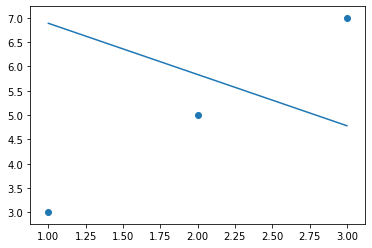

None
 step: 60
 cost:2.7405271530151367
 Weight: [0.12351401] 
 bias:[5.2656937]
--------------------------------------------------


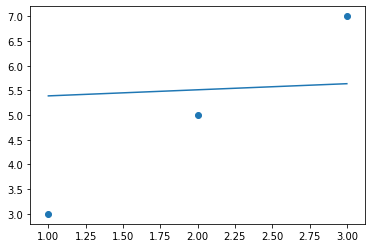

None
 step: 80
 cost:1.0354448556900024
 Weight: [0.8465685] 
 bias:[3.622021]
--------------------------------------------------


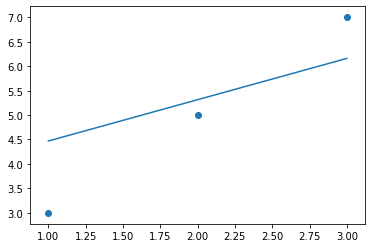

None
 step: 100
 cost:0.39121899008750916
 Weight: [1.291013] 
 bias:[2.611694]
--------------------------------------------------


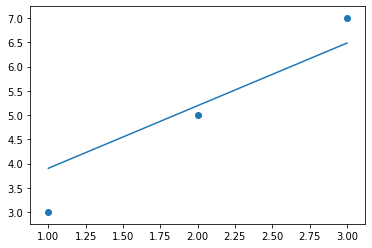

None
 step: 120
 cost:0.1478131115436554
 Weight: [1.5642024] 
 bias:[1.9906702]
--------------------------------------------------


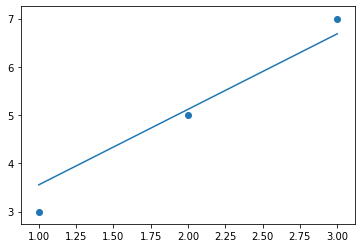

None
 step: 140
 cost:0.05584784224629402
 Weight: [1.7321256] 
 bias:[1.6089414]
--------------------------------------------------


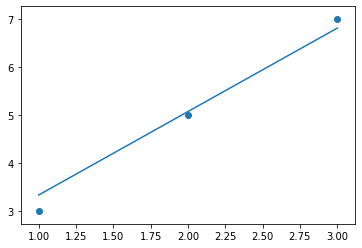

None
 step: 160
 cost:0.02110079675912857
 Weight: [1.835344] 
 bias:[1.3743018]
--------------------------------------------------


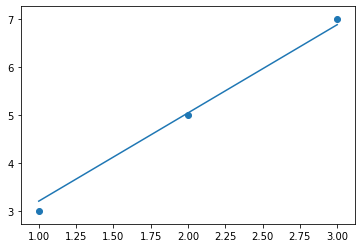

None
 step: 180
 cost:0.00797244906425476
 Weight: [1.8987898] 
 bias:[1.2300745]
--------------------------------------------------


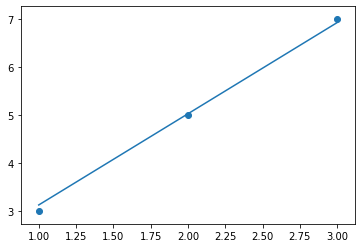

None
 step: 200
 cost:0.00301222107373178
 Weight: [1.9377886] 
 bias:[1.1414213]
--------------------------------------------------


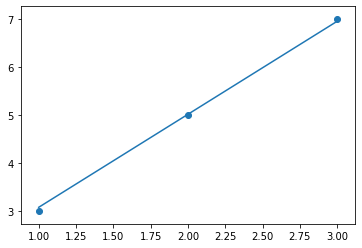

None
 step: 220
 cost:0.0011380972573533654
 Weight: [1.9617602] 
 bias:[1.0869284]
--------------------------------------------------


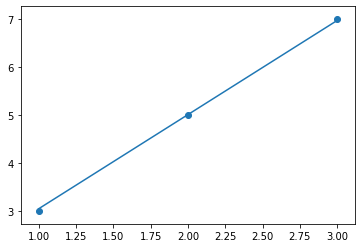

None
 step: 240
 cost:0.00042999666766263545
 Weight: [1.9764949] 
 bias:[1.0534327]
--------------------------------------------------


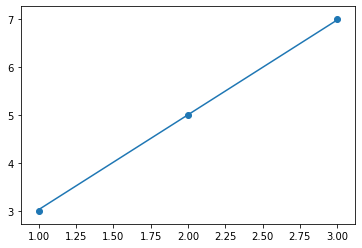

None
 step: 260
 cost:0.00016246548329945654
 Weight: [1.985552] 
 bias:[1.0328438]
--------------------------------------------------


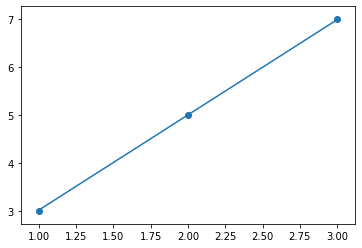

None
 step: 280
 cost:6.13835800322704e-05
 Weight: [1.991119] 
 bias:[1.0201885]
--------------------------------------------------


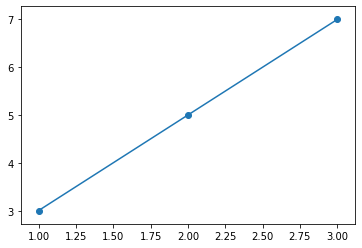


=== Test ===
X: 5, Y: [10.984749]
X: 2.5, Y: [5.998732]
Weight와 bias
[array([1.9944067], dtype=float32), array([1.0127152], dtype=float32)]


In [7]:
# 세션 생성 및 초기화.
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer()) # 변수 초기화

    # 최적화를 300번 수행합니다.
    for step in range(300):
        # sess.run 을 통해 train_op 와 cost 그래프를 계산한다.
        # 이 때, Hypothesis에 넣어야 할 실제값을 feed_dict 을 통해 전달합니다.
        _, cost_val, weight, bias = sess.run([train_op, cost, W, b], feed_dict={X: x_data, Y: y_data})
        
        # _는 None값. --> compute_gradients, apply_gradients가 실행됩니다.
        # --> W값 자동으로 조정합니다.
        
        if step%20==0:
            # 20번에 한번씩 진행하기
            print(_)
            print(" step: {}\n cost:{}\n Weight: {} \n bias:{}".format(step, cost_val, weight, bias))
            print("-"*50)
            h = sess.run(hypothesis, feed_dict={X: x_data})
            
            plt.plot(x_data, h)
            plt.scatter(x_data, y_data)
            plt.show()

    # 최적화가 완료된 모델에 테스트 값을 넣고 결과가 잘 나오는지 확인해봅니다.
    print("\n=== Test ===")
    print("X: 5, Y:", sess.run(hypothesis, feed_dict={X: 5}))
    print("X: 2.5, Y:", sess.run(hypothesis, feed_dict={X: 2.5}))
    print("Weight와 bias")
    print(sess.run([W, b]))


# 연습문제3. Boston Data LinearRegression

### 1. DataLoad

In [78]:
reset_all()

In [79]:
import tensorflow as tf
from sklearn import datasets
from sklearn import model_selection
from sklearn.preprocessing import StandardScaler
import pandas as pd

In [80]:
# boston 집값 예측
boston = datasets.load_boston()
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [81]:
# boston data 설명
"""
CRIM	자치시(town) 별 1인당 범죄율
ZN	25,000 평방피트를 초과하는 거주지역의 비율
INDUS	비소매상업지역이 점유하고 있는 토지의 비율
CHAS	찰스강에 대한 더미변수(강의 경계에 위치한 경우는 1, 아니면 0)
NOX	10ppm 당 농축 일산화질소
RM	주택 1가구당 평균 방의 개수
AGE	1940년 이전에 건축된 소유주택의 비율
DIS	5개의 보스턴 직업센터까지의 접근성 지수
RAD	방사형 도로까지의 접근성 지수
TAX	10,000 달러 당 재산세율
PTRATIO	자치시(town)별 학생/교사 비율
B	1000(Bk-0.63)^2, 여기서 Bk는 자치시별 흑인의 비율을 말함.
LSTAT	모집단의 하위계층의 비율(%)
MEDV	본인 소유의 주택가격(중앙값) (단위: $1,000)
"""
# boston의 범죄율 등으로 집값 예측
boston_housing = boston.data
boston_label = boston.target
m, n = boston_housing.shape # shape 저장 (m X n)행렬

In [82]:
## code 시작!

### 2. 전처리

## 3. Graph 정의

In [83]:
## 3. Graph 정의

## 4. 수행

# 모범 답안

### 2. 전처리

In [84]:
boston_df = pd.DataFrame(boston_housing, columns=boston.feature_names)

In [85]:
boston_df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [86]:
# 결측치 없음
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
dtypes: float64(13)
memory usage: 51.5 KB


In [87]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_boston_housing = scaler.fit_transform(boston_housing) 

### bias 데이터에 추가

In [88]:
# np.c_ 함수는 concatenate 함수 (연결한다!)
# bias에 행렬 추가
scaled_boston_housing_plus_bias = np.c_[np.ones((m, 1)), scaled_boston_housing] ## bias 추가

print("mean(항목간): ", scaled_boston_housing_plus_bias.mean(axis=0))
print("mean(전체): ", scaled_boston_housing_plus_bias.mean())
print("shape: ",scaled_boston_housing_plus_bias.shape)

mean(항목간):  [ 1.00000000e+00 -8.78743718e-17 -6.34319123e-16 -2.68291099e-15
  4.70199198e-16  2.49032240e-15 -1.14523016e-14 -1.40785495e-15
  9.21090169e-16  5.44140929e-16 -8.86861950e-16 -9.20563581e-15
  8.16310129e-15 -3.37016317e-16]
mean(전체):  0.0714285714285704
shape:  (506, 14)


## 3. Graph 정의

In [89]:
# 그래프 초기화
tf.reset_default_graph()

In [90]:
n_epochs = 1000 # epoch --> 학습횟수(반복횟수)
lr = 0.01 # learning rate

#### 1. X와 y정의

In [91]:
scaled_boston_housing_plus_bias.shape

(506, 14)

In [92]:
X = tf.placeholder(dtype=tf.float32, shape=(None, n+1), name="X")
y = tf.placeholder(dtype=tf.float32, shape=(None, 1), name='y')

#### Hypothesis&Cost 정의

In [93]:
m,n

(506, 13)

In [94]:
# M: 데이터의 개수, N: Feature의 개수
# n(feature의 개수) +1 --> bias
W = tf.Variable(tf.random_uniform([n+1, 1], -1.0, 1.0), name='Weight')  # N+1 X 1 행렬
y_pred = tf.matmul(X, W, name='predictions') # hypothesis  --> M X 1행렬  = M X N+1 * N+1 X 1 

In [95]:
# ==> y값은 MX1 로 넣어줘야함 행렬연산 위해
error = y_pred - y # MX1행렬 (데이터의 개수 만큼 error가 나옴.) --> Data 1개당 에러 (오차)  

# Mean Sqaure Error
mse = tf.reduce_mean(tf.square(error), name='mse') # Cost Function

#### 옵티마이저

In [96]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=lr)
# mse를 최소화하는게 목적!
training_op = optimizer.minimize(mse) 

### label reshape

In [97]:
print(boston_label.shape)
# 행렬간 연산을 위해선 2차원 행렬로 만들어줘야함.
boston_label = boston_label.reshape(-1, 1)
boston_label.shape

(506,)


(506, 1)

## 4. 실행

In [98]:
init = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init)

    for epoch in range(n_epochs):
        if epoch % 100 == 0:
            # feed_dict 추가
            print("Epoch", epoch, "MSE =", 
                  mse.eval(feed_dict={
                      X:scaled_boston_housing_plus_bias, 
                      y:boston_label})
                 )
        
        # weight 업데이트
        sess.run(training_op, feed_dict={X:scaled_boston_housing_plus_bias, y:boston_label})
    
    best_weight = W.eval()

best_weight

Epoch 0 MSE = 604.09924
Epoch 100 MSE = 32.656425
Epoch 200 MSE = 22.976612
Epoch 300 MSE = 22.469475
Epoch 400 MSE = 22.274014
Epoch 500 MSE = 22.158728
Epoch 600 MSE = 22.085155
Epoch 700 MSE = 22.035545
Epoch 800 MSE = 22.000622
Epoch 900 MSE = 21.975252


array([[22.53276   ],
       [-0.8741372 ],
       [ 0.9825873 ],
       [-0.09778322],
       [ 0.7161328 ],
       [-1.9562924 ],
       [ 2.7386327 ],
       [-0.02938651],
       [-3.0651114 ],
       [ 2.0365107 ],
       [-1.3891711 ],
       [-2.029657  ],
       [ 0.84994835],
       [-3.7100434 ]], dtype=float32)

# 텐서보드 사용하기

In [99]:
from datetime import datetime

In [100]:
now = datetime.now().strftime("%Y%m%d%H%M%S")
root_logdir = './tf_logs'
logdir = "{}/{}".format(root_logdir, now)

In [101]:
mse_summary = tf.summary.scalar('MSE', mse)   # scalar에 대한 summary 기록 ==> 이것도 tensor
file_writer = tf.summary.FileWriter(logdir, tf.get_default_graph()) # 현재 그래프에 대한 내용. (filewriter를 통해 기록할 수 있음)

#### 보스턴 학습 데이터 입니다.

In [102]:
init = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init)

    for epoch in range(n_epochs):
        if epoch % 100 == 0:
            # feed_dict 추가
            # summary 만들기
            summary_str = mse_summary.eval(feed_dict={X: scaled_boston_housing_plus_bias, y: boston_label})
            step = epoch
            # summary 추가.
            file_writer.add_summary(summary_str, step)
        
        # weight 업데이트
        sess.run(training_op, feed_dict={X:scaled_boston_housing_plus_bias, y:boston_label})
    
    best_weight = W.eval()

best_weight



array([[22.53276   ],
       [-0.8642865 ],
       [ 0.9669193 ],
       [-0.12862054],
       [ 0.7203732 ],
       [-1.9374678 ],
       [ 2.742877  ],
       [-0.02423596],
       [-3.0457675 ],
       [ 1.9522198 ],
       [-1.2974844 ],
       [-2.0257564 ],
       [ 0.84894943],
       [-3.7163231 ]], dtype=float32)

In [103]:
file_writer.close()

In [104]:
# 파일 추가
!ls {root_logdir}/*
# !dir {root_logdir}/*

./tf_logs/20190717032424:
events.out.tfevents.1563301464.Genusui-MacBook-Pro-2.local

./tf_logs/20190717130828:
events.out.tfevents.1563336508.Genusui-MacBook-Pro-2.local

./tf_logs/20190717131712:
events.out.tfevents.1563337037.Genusui-MacBook-Pro-2.local

./tf_logs/20190717133130:
events.out.tfevents.1563337890.Genusui-MacBook-Pro-2.local

./tf_logs/boston:
20190717132307

./tf_logs/boston-20190717132200:
events.out.tfevents.1563337327.Genusui-MacBook-Pro-2.local


In [105]:
import sys
!tensorboard --logdir {root_logdir}

TensorFlow installation not found - running with reduced feature set.
TensorBoard 1.14.0 at http://Genusui-MacBook-Pro-2.local:6006/ (Press CTRL+C to quit)
^C


# 연습문제 4. diabetes 데이터

442명의 당뇨병 환자를 대상으로한 검사 결과를 나타내는 데이터이다.

타겟 데이터

1년 뒤 측정한 당뇨병의 진행률
특징 데이터 (이 데이터셋의 특징 데이터는 모두 정규화된 값이다.)

Age
Sex
Body mass index
Average blood pressure
S1
S2
S3
S4
S5
S6

# 1. 데이터 로드 

In [215]:
reset_all()

In [216]:
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
import pandas as pd

diabetes = load_diabetes()
diabetes_df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
diabetes_df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641


In [217]:
diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 10 columns):
age    442 non-null float64
sex    442 non-null float64
bmi    442 non-null float64
bp     442 non-null float64
s1     442 non-null float64
s2     442 non-null float64
s3     442 non-null float64
s4     442 non-null float64
s5     442 non-null float64
s6     442 non-null float64
dtypes: float64(10)
memory usage: 34.6 KB


# 시작!

# 모범답안

In [252]:
# 충분히 작네요. 
# 스케일링이 크게 필요해보이진 않을 거 같은데..
diabetes_df.describe()

## 이유는..? 이미 정규화가 되어있어서 그렇습니다.

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02
mean,-3.639623e-16,1.309912e-16,-8.013951e-16,1.289818e-16,-9.042540e-17,1.301121e-16,-4.563971e-16,3.863174e-16,-3.848103e-16,-3.398488e-16
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123996e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260974e-01,-1.377672e-01
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665645e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324879e-02,-3.317903e-02
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670611e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947634e-03,-1.077698e-03
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564384e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243323e-02,2.791705e-02
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320442e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335990e-01,1.356118e-01


In [253]:
# 이번엔 test와 trainset을 나눠서 합니다.
X_train, X_test, y_train, y_test = train_test_split(diabetes_data, diabetes.target, test_size=0.2)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((353, 10), (353,), (89, 10), (89,))

### bias 추가

In [254]:
def plus_bias(X):
    # 왜 이번엔 함수로?
    m = X.shape[0]
    return np.c_[np.ones((m, 1)), X]

In [255]:
X_train_plus_bias = plus_bias(X_train)
X_test_plus_bias = plus_bias(X_test)

y_train_reshaped = y_train.reshape(-1, 1)
y_test_reshaped = y_test.reshape(-1, 1)

## 3. Graph 정의

In [256]:
n_epochs = 1000 # epoch --> 학습횟수(반복횟수)
lr = 0.03 # learning rate

In [257]:
m, n= X_train_plus_bias.shape

#### 1. X와 y정의

In [258]:
X = tf.placeholder(dtype=tf.float32, shape=(None, n), name="X")
y = tf.placeholder(dtype=tf.float32, shape=(None, y_train_reshaped.shape[1]), name='y')

#### Hypothesis&Cost 정의

In [259]:
m,n

(353, 11)

In [260]:
# M: 데이터의 개수, N: Feature_bias 의 개수
W = tf.Variable(tf.random_uniform([n, 1], -1.0, 1.0), name='Weight')  # N X 1 행렬
y_pred = tf.matmul(X, W, name='predictions') # hypothesis  --> M X 1행렬  = M X N+1 * N+1 X 1 

error = y_pred - y

# Mean Sqaure Error
mse = tf.reduce_mean(tf.square(error), name='mse') # Cost Function

#### 옵티마이저

In [261]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=lr)

training_op = optimizer.minimize(mse)  # mse를 최소화하는게 목적!

# 수행

In [262]:
init = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init)

    for epoch in range(n_epochs):
        if epoch % 100 == 0:
            # feed_dict 추가
            print("Epoch", epoch, "MSE =", 
                  mse.eval(feed_dict={
                      X:X_train_plus_bias, 
                      y:y_train_reshaped})
                 )
        
        # weight 업데이트
        sess.run(training_op, feed_dict={X:X_train_plus_bias, y:y_train_reshaped})
    
    best_weight = W.eval()
    train_y_pred = y_pred.eval(feed_dict={X:X_train_plus_bias})
    

best_weight, train_y_pred

Epoch 0 MSE = 29321.143
Epoch 100 MSE = 2894.44
Epoch 200 MSE = 2893.5872
Epoch 300 MSE = 2893.22
Epoch 400 MSE = 2892.886
Epoch 500 MSE = 2892.5808
Epoch 600 MSE = 2892.3013
Epoch 700 MSE = 2892.0457
Epoch 800 MSE = 2891.8113
Epoch 900 MSE = 2891.597


(array([[153.75525  ],
        [ -2.3980136],
        [-12.808188 ],
        [ 25.502111 ],
        [ 15.879994 ],
        [ -7.5122223],
        [ -1.350328 ],
        [ -9.387492 ],
        [  5.971335 ],
        [ 25.486845 ],
        [  2.4361887]], dtype=float32), array([[ 99.902885],
        [170.96802 ],
        [271.98535 ],
        [170.00981 ],
        [158.75075 ],
        [233.82144 ],
        [192.32132 ],
        [124.8851  ],
        [147.21136 ],
        [285.08505 ],
        [ 70.38226 ],
        [162.7823  ],
        [174.14699 ],
        [196.8291  ],
        [233.61275 ],
        [198.7015  ],
        [218.43336 ],
        [ 92.48653 ],
        [142.86653 ],
        [120.27972 ],
        [184.62056 ],
        [171.81502 ],
        [103.9253  ],
        [135.26508 ],
        [170.31659 ],
        [ 83.5948  ],
        [187.56886 ],
        [200.046   ],
        [107.84084 ],
        [137.4637  ],
        [149.15414 ],
        [268.93793 ],
        [160.39925 ],
     

# training set 학습의 평가

In [263]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html
from sklearn.metrics import r2_score
# r2_score(y_true, y_pred) # 사용법
r2_score(y_train_reshaped, train_y_pred)

0.5184355308446182

# Test

In [264]:
init = tf.global_variables_initializer()
with tf.Session() as sess:
    sess.run(init)
    sess.run(tf.assign(W, best_weight))
    
    test_y_pred = y_pred.eval(feed_dict={X:X_test_plus_bias})
    

In [265]:
test_y_pred.shape

(89, 1)

In [266]:
r2_score(y_test_reshaped, test_y_pred)

0.4896096023126868

# 이름 범위 - 관련 노드를 묶기

##### boston_data로

In [106]:
reset_all()

In [107]:
now = datetime.now().strftime("%Y%m%d%H%M%S")
root_logdir = "tf_logs/boston"
logdir = "{}/{}/".format(root_logdir, now)

n_epochs = 1000
learning_rate = 0.01

X = tf.placeholder(tf.float32, shape=(None, n + 1), name="X")
y = tf.placeholder(tf.float32, shape=(None, 1), name="y")
W = tf.Variable(tf.random_uniform([n + 1, 1], -1.0, 1.0, seed=42), name="Weight")
y_pred = tf.matmul(X, W, name="predictions")

#### Hypothesis&Cost 정의

In [108]:
m,n

(506, 13)

In [109]:
# M: 데이터의 개수, N: Feature의 개수
# n(feature의 개수) +1 --> bias
W = tf.Variable(tf.random_uniform([n+1, 1], -1.0, 1.0), name='Weight')  # N+1 X 1 행렬
y_pred = tf.matmul(X, W, name='predictions') # hypothesis  --> M X 1행렬  = M X N+1 * N+1 X 1 

# 이름 범위로 묶기! (중요)

In [110]:
# 이름 범위로 묶기
# ==> y값은 MX1 로 넣어줘야함 행렬연산 위해
with tf.name_scope("loss") as scope: 
    error = y_pred - y  # MX1행렬 (데이터의 개수 만큼 error가 나옴.) --> Data 1개당 에러 (오차)  
    mse = tf.reduce_mean(tf.square(error), name="mse")

#### 옵티마이저

In [111]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=lr)
# mse를 최소화하는게 목적!
training_op = optimizer.minimize(mse) 

print(boston_label.shape)
# 행렬간 연산을 위해선 2차원 행렬로 만들어줘야함.
boston_label = boston_label.reshape(-1, 1)
boston_label.shape

(506, 1)


(506, 1)

## 4. 실행

In [112]:
init = tf.global_variables_initializer()

mse_summary = tf.summary.scalar('MSE', mse)
file_writer = tf.summary.FileWriter(logdir, tf.get_default_graph())

with tf.Session() as sess:
    sess.run(init)

    for epoch in range(n_epochs):
        if epoch % 100 == 0:
            # feed_dict 추가
            print("Epoch", epoch, "MSE =", 
                  mse.eval(feed_dict={
                      X:scaled_boston_housing_plus_bias, 
                      y:boston_label})
                 )
        
        # weight 업데이트
        sess.run(training_op, feed_dict={X:scaled_boston_housing_plus_bias, y:boston_label})
    
    best_weight = W.eval()

best_weight

Epoch 0 MSE = 635.07733
Epoch 100 MSE = 33.143425
Epoch 200 MSE = 22.849066
Epoch 300 MSE = 22.352732
Epoch 400 MSE = 22.177645
Epoch 500 MSE = 22.081043
Epoch 600 MSE = 22.023434
Epoch 700 MSE = 21.986954
Epoch 800 MSE = 21.962587
Epoch 900 MSE = 21.945585


array([[ 2.2532761e+01],
       [-8.8221163e-01],
       [ 9.9677521e-01],
       [-4.0630255e-02],
       [ 7.0836574e-01],
       [-1.9678457e+00],
       [ 2.7275236e+00],
       [-1.4554740e-02],
       [-3.0529330e+00],
       [ 2.1692324e+00],
       [-1.5392742e+00],
       [-2.0368829e+00],
       [ 8.5041231e-01],
       [-3.7198966e+00]], dtype=float32)

In [113]:
file_writer.close()
import sys
!tensorboard --logdir {root_logdir}

TensorFlow installation not found - running with reduced feature set.
TensorBoard 1.14.0 at http://Genusui-MacBook-Pro-2.local:6006/ (Press CTRL+C to quit)
^C


# Logistic Regression 눈으로 확인하기

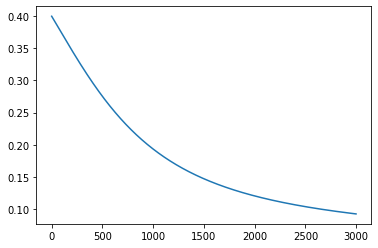

W: -1.7555
b: -0.3913
[[0.20356686]
 [0.27407538]
 [0.35802713]
 [0.45169327]
 [0.54891163]
 [0.6425341 ]
 [0.72641033]
 [0.79682888]
 [0.85279551]
 [0.89536963]]


In [12]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

X_train = np.linspace(-1, 1, 10)  # 예를 위한 X 데이터
y_train = np.asmatrix([0,0,0,0,1,1,1,1,1,1]).T
X_train = np.asmatrix(X_train).T


n_dim = X_train.shape[1]

lr = tf.constant(0.01,dtype=tf.float32)
num_epochs = 3000

X = tf.placeholder(tf.float32, [X_train.shape[0],n_dim])
y = tf.placeholder(tf.float32, [X_train.shape[0],1])
w = tf.Variable(np.ones([n_dim,1]),dtype=tf.float32)
b = tf.Variable(0, dtype=tf.float32)
init = tf.global_variables_initializer()

yhat = (1./(1+tf.exp(tf.matmul(X,w) + b)))
loss = tf.reduce_mean(tf.square(yhat - y))
train_op = tf.train.GradientDescentOptimizer(lr).minimize(loss)


#initialize session
sess = tf.Session()
sess.run(init)

loss_history = []
for epoch in range(num_epochs):
    sess.run(train_op,feed_dict={X: X_train, y: y_train})
    loss_history.append(sess.run(loss,feed_dict={X: X_train, y: y_train}))


plt.plot(range(len(loss_history)),loss_history)
plt.show()

w = sess.run(w)
b = sess.run(b)
print("W: %.4f" % w) 
print("b: %.4f" % b) 

print (1./(1+np.exp(np.dot(X_train,w) + b)))


# 1장 끝 - 종료

# 모범 답안

### 2. graph 정의

In [ ]:
# Weight와 bias 정의
W = tf.Variable(tf.random_normal([train_X.shape[1], 1])) # 13길이의 열벡터를 랜덤하게 만듬 
b = tf.Variable(tf.random_normal([1]))

# X data와, Y data 정의
X = tf.placeholder(tf.float32, shape=(None, train_X.shape[1]))
Y = tf.placeholder(tf.float32)

In [ ]:
# hypothesis와 Cost함수 정의
hypothesis = tf.matmul(X, W) + b

# 오차 제곱의 평균
cost = tf.reduce_mean(tf.square(hypothesis - Y))
print(cost)

In [ ]:
# Optimizer
learning_rate = 1.0e-6
optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate)
train_op = optimizer.minimize(cost)

### 3. 훈련 (session.run)

In [ ]:
import numpy as np
tf.set_random_seed(0)

with tf.Session() as session:
    # W와 b를 초기화
    session.run(tf.global_variables_initializer())
    
    for step in range(1000000):
        # 우리가 알고 싶은 값
        _, cost_val, W_val, b_val = session.run([train_op, cost, W, b], feed_dict={X:train_X, Y:train_Y})
        # 끝났지만 진행 상황을 알고 싶다.
        if step%100000==0:
            # 20번에 한번씩 진행하기
            print(" step: {}\n cost:{}\n Weight: {} \n bias:{}".format(step, cost_val, W_val, b_val))
            print("-"*50)
            
    # 최적화가 완료된 모델에 테스트 값을 넣고 결과가 잘 나오는지 확인해봅니다.
    print("\n=== Test ===")
    pred_test = session.run(hypothesis, feed_dict={X: test_X})
    pred_train = session.run(hypothesis, feed_dict={X: train_X})
    print("pred: ", pred)
    print("Weight와 bias: ", session.run([W, b]))
    
    print("="*50)
print(np.array(zip(pred_test.flatten(), test_Y.flatten())))

### 4. Test

# Linear Regression 실습하기

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt

### 1. dataLoad

In [ ]:
# y = 2*x + 1
# w[1] = 2, w[0]= 1
x_data = [1, 2, 3]
y_data = [3, 5, 7]

### 2. Graph 정의

In [ ]:
# W1과 W0을 구하는게 우리의 목표!
# 일단 하나 정하고 조정하기. ==> Variable을 쓰고, 초기값 설정
W = tf.Variable(tf.random_uniform([1], -100, 100)) # W1 - Weight
b = tf.Variable(tf.random_uniform([1], -100, 100)) # W0 - bias

# name: 나중에 텐서보드등으로 값의 변화를 추적하거나 살펴보기 쉽게 하기 위해 이름을 붙여준다.
# 왜 tf.placeholder를 사용하는가? 생각해보자!
# 
# 새로운 데이터를 예측하기 위해서 훈련을 합니다.
# --> 기존데이터로 훈련을 하고, 훈련된 모델을 새로운 데이터로 바꿀 수 있어야 합니다.
X = tf.placeholder(tf.float32, name="X") # 훈련 데이터
Y = tf.placeholder(tf.float32, name="Y") # 정답 데이터

In [ ]:
# hypothesis 정의
# W 와 X 가 행렬이 아니므로 tf.matmul 이 아니라 기본 곱셈 기호를 사용한다.
hypothesis = W * X + b

# Cost Function을 작성한다. (손실 함수)
# mean(h - Y)^2 : 예측값과 실제값의 차이의 제곱의 평균
err = tf.square(hypothesis - Y)
cost = tf.reduce_mean(err)


In [ ]:
# 훈련률: 0.1: optimizer가 Variable을(Weight를) 자동으로 조정한다.
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.1) 

# 비용을 최소화 하는 것이 최종 목표
train_op = optimizer.minimize(cost)  # compute_gradients, apply_gradients가 실행됩니다.

### 3. 학습

In [ ]:
# 세션 생성 및 초기화.
with tf.Session() as sess:
    writer = tf.summary.FileWriter('./summary', session.graph)
    sess.run(tf.global_variables_initializer()) # 변수 초기화

    # 최적화를 300번 수행합니다.
    for step in range(300):
        # sess.run 을 통해 train_op 와 cost 그래프를 계산한다.
        # 이 때, Hypothesis에 넣어야 할 실제값을 feed_dict 을 통해 전달합니다.
        _, cost_val, weight, bias = sess.run([train_op, cost, W, b], feed_dict={X: x_data, Y: y_data})
        
        # _는 None값. --> compute_gradients, apply_gradients가 실행됩니다.
        # --> W값 자동으로 조정합니다.
        
        if step%20==0:
            # 20번에 한번씩 진행하기
            print(_)
            print(" step: {}\n cost:{}\n Weight: {} \n bias:{}".format(step, cost_val, weight, bias))
            print("-"*50)
            h = sess.run(hypothesis, feed_dict={X: x_data})
            
            plt.plot(x_data, h)
            plt.scatter(x_data, y_data)
            plt.show()

    # 최적화가 완료된 모델에 테스트 값을 넣고 결과가 잘 나오는지 확인해봅니다.
    print("\n=== Test ===")
    print("X: 5, Y:", sess.run(hypothesis, feed_dict={X: 5}))
    print("X: 2.5, Y:", sess.run(hypothesis, feed_dict={X: 2.5}))
    print("Weight와 bias")
    print(sess.run([W, b]))


In [ ]:
# optimizer 선택 with data

# TensorFlow Graph Final

In [ ]:
import tensorflow as tf
node1 = tf.constant(2, dtype=tf.float32)
node2 = tf.constant(3, dtype=tf.float32)
node3 = tf.placeholder(tf.float32)
node4 = tf.placeholder(tf.float32)

node5 = node1*node2 + (node3/node4)
# 동일합니다.
# node4 = tf.add(tf.multiply(node1, node2), node3)

In [ ]:
# with절 사용시 close 안해줘도 됨.
with tf.Session() as session:
    writer = tf.summary.FileWriter('./summary', session.graph)
    print(writer)
    result = session.run(node4, feed_dict={node3: 8, node4:2})
    print(result)

In [ ]:
# tensorboard
!tensorboard --logdir="./summary"